In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt


In [2]:

# 1. PREPARAÇÃO: Codificar o número 6 (Binário 110)
# Em Qiskit (Little Endian): q0 é o menos significativo.
# 6 = 0 * (2^0) + 1 * (2^1) + 1 * (2^2) -> q0=0, q1=1, q2=1
num_qubits = 3
qc = QuantumCircuit(num_qubits)

# Codificando o '6' (Portas X onde o bit é 1)
# qc.x(0) # q0 = 0 (não fazemos nada)
qc.x(1) # q1 = 1
qc.x(2) # q2 = 1

# Vamos salvar o estado visual ANTES da QFT
estado_antes = Statevector(qc)
print("--- Estado Antes (Binário 110) ---")
# Vai mostrar setas para baixo (1) e para cima (0)


--- Estado Antes (Binário 110) ---


C:\Users\Max\AppData\Local\Temp\ipykernel_18328\3244769350.py:3: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc_qft = QFT(num_qubits, do_swaps=False).to_gate()


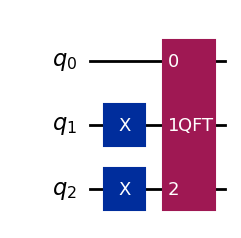

In [3]:

# 2. A MÁGICA: Aplicar a QFT
# A biblioteca cria o circuito complexo de Hadamards e Rotações para nós
qc_qft = QFT(num_qubits, do_swaps=False).to_gate()
qc.append(qc_qft, range(num_qubits))

# Vamos salvar o estado visual DEPOIS da QFT
estado_depois = Statevector(qc)

# Desenha o circuito completo
qc.draw('mpl') 



--- Gerando Esferas de Bloch... ---


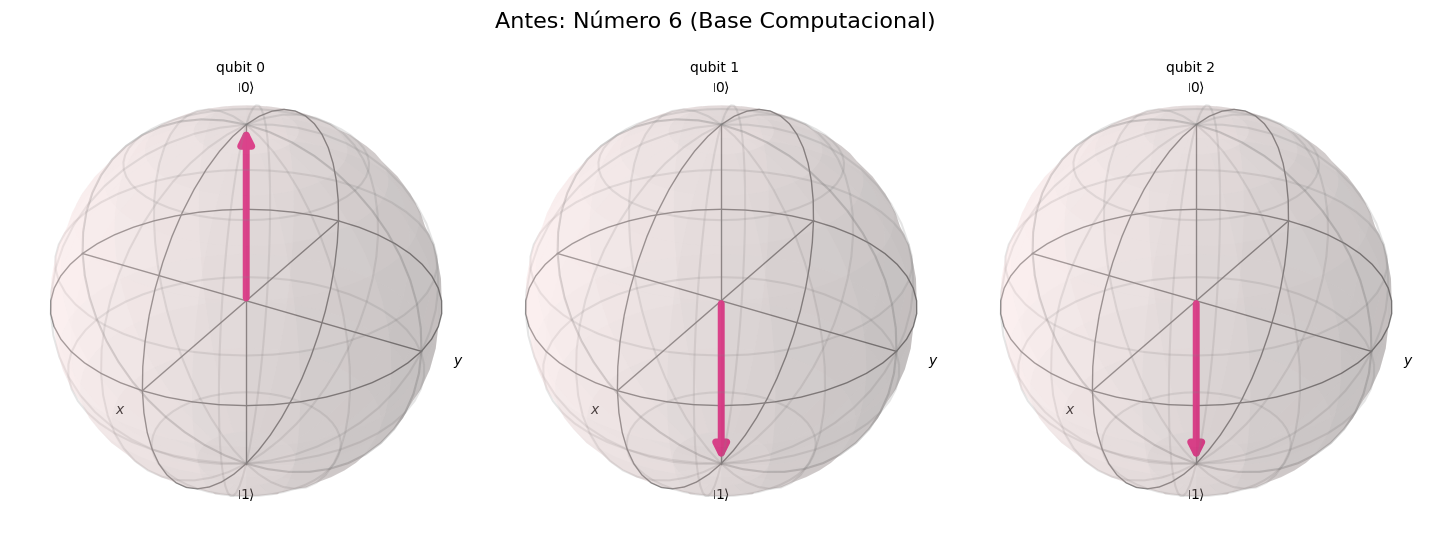

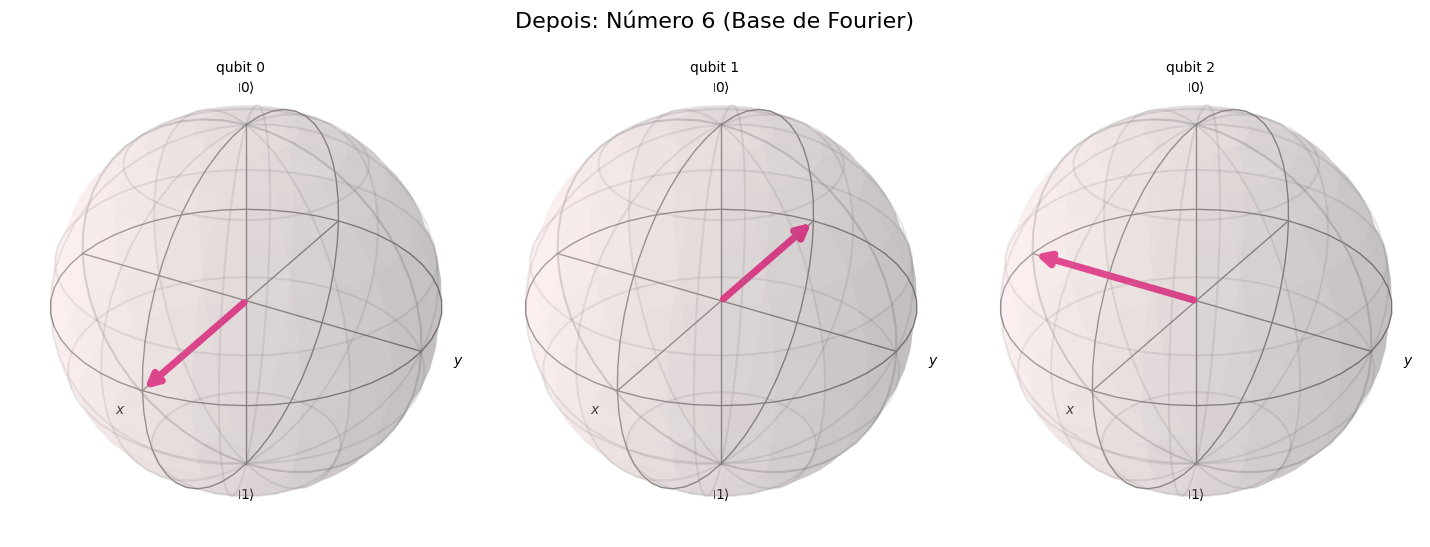

In [4]:
from IPython.display import display

# 3. VISUALIZAÇÃO
print("\n--- Gerando Esferas de Bloch... ---")

# Plot 1: Binário Puro
fig1 = plot_bloch_multivector(estado_antes, title="Antes: Número 6 (Base Computacional)")
display(fig1)

# Plot 2: Fourier
fig2 = plot_bloch_multivector(estado_depois, title="Depois: Número 6 (Base de Fourier)")
display(fig2)

### O que você vai ver nas imagens:

1. **Imagem "Antes":**
* Qubits apontam para o Pólo Sul (1) ou Norte (0). Nada de novo.


2. **Imagem "Depois" (A parte interessante):**
* **Todos** os qubits estão na linha do Equador (a seta vermelha está deitada). Isso significa que todos têm 50% de chance de ser 0 ou 1.
* **A Diferença:** Olhe para a direção da seta no plano XY (a rotação).
* O **Qubit 2** girou um ângulo específico.
* O **Qubit 1** girou o dobro desse ângulo.
* O **Qubit 0** girou ainda mais.





Se você mudasse o código para codificar o número **1**, as setas girariam muito pouco. Se codificasse o **7**, elas girariam quase a volta toda.

### Por que isso é útil? (A Intuição do Algoritmo de Shor)

Aqui está o "pulo do gato" para a fatoração:

Computadores clássicos são ruins em achar **periodicidade** (padrões que se repetem) em dados gigantes.
Computadores quânticos, usando a QFT, transformam esse problema de "achar padrão" em um problema de "medir rotação".

1. Você cria uma superposição de todos os números possíveis.
2. Você faz um cálculo matemático modular (o coração do algoritmo de Shor).
3. As respostas "erradas" criam interferência destrutiva.
4. As respostas "certas" criam um padrão de rotação construtivo.
5. Você aplica a **QFT Inversa**. Ela traduz essas rotações de volta para números binários (0 e 1).
6. O resultado que você mede é o **período** da função, que é a chave para quebrar a senha RSA.

### Desafio Prático

Tente alterar o código acima. Onde tem `qc.x(1)` e `qc.x(2)` (número 6), deixe apenas `qc.x(0)` (número 1) e rode novamente.
Observe como as setas na imagem "Depois" giram muito menos. Essa sensibilidade visual é a essência da "frequência".

### Interpretação dos resultados baseados na precisão dos qubits

In [5]:
# Visualizar o vetor de estados com melhor formatação
print("\n=== ESTADO ANTES DA QFT (Base Computacional) ===")
print(f"Representação: |110⟩ (número 6 em binário)")
display(estado_antes.draw('latex'))
print(f"\nAmplitudes:")
for i, amp in enumerate(estado_antes.data):
    if abs(amp) > 1e-10:  # Mostrar apenas amplitudes não-zero
        print(f"  |{i:03b}⟩: {amp.real:+.8f} {amp.imag:+.8f}j  (|amp| = {abs(amp):.8f})")




=== ESTADO ANTES DA QFT (Base Computacional) ===
Representação: |110⟩ (número 6 em binário)


<IPython.core.display.Latex object>


Amplitudes:
  |110⟩: +1.00000000 +0.00000000j  (|amp| = 1.00000000)


In [6]:

print("\n" + "="*60)
print("\n=== ESTADO DEPOIS DA QFT (Base de Fourier) ===")
print(f"Informação codificada nas fases (rotações)")
display(estado_depois.draw('latex'))
print(f"\nAmplitudes α, β, ... (note os valores complexos):")
for i, amp in enumerate(estado_depois.data):
    print(f"Estado |{i:03b}⟩: {amp.real:+.8f} {amp.imag:+.8f}j")

# Mostrar as fases de cada amplitude
print("\n--- Fases (ângulos) de cada amplitude ---")
fases = np.angle(estado_depois.data, deg=True)
for i, fase in enumerate(fases):
    print(f"Estado |{i:03b}⟩: Fase = {fase:7.2f}°")



=== ESTADO DEPOIS DA QFT (Base de Fourier) ===
Informação codificada nas fases (rotações)


<IPython.core.display.Latex object>


Amplitudes α, β, ... (note os valores complexos):
Estado |000⟩: +0.35355339 +0.00000000j
Estado |001⟩: +0.35355339 +0.00000000j
Estado |010⟩: -0.35355339 +0.00000000j
Estado |011⟩: -0.35355339 +0.00000000j
Estado |100⟩: -0.00000000 -0.35355339j
Estado |101⟩: -0.00000000 -0.35355339j
Estado |110⟩: +0.00000000 +0.35355339j
Estado |111⟩: +0.00000000 +0.35355339j

--- Fases (ângulos) de cada amplitude ---
Estado |000⟩: Fase =    0.00°
Estado |001⟩: Fase =    0.00°
Estado |010⟩: Fase =  180.00°
Estado |011⟩: Fase =  180.00°
Estado |100⟩: Fase =  -90.00°
Estado |101⟩: Fase =  -90.00°
Estado |110⟩: Fase =   90.00°
Estado |111⟩: Fase =   90.00°


# Visualizando a Transformada de Fourier Quântica (QFT) com Esferas de Bloch

A **Transformada de Fourier Quântica (QFT)** é, essencialmente, uma máquina de **tradução**.

* **Língua 1 (Base Computacional):** Você guarda informação ligando ou desligando switches (0 ou 1). É digital.
* **Língua 2 (Base de Fourier):** Você guarda informação na **fase** (na rotação) dos qubits. É analógico/ondulatório.

### A Analogia do Relógio

Imagine que você quer representar o número **6**.

1. **Jeito Clássico (Binário):** Você escreve `110`.
* Qubit 2: Ligado (1)
* Qubit 1: Ligado (1)
* Qubit 0: Desligado (0)
* *Visual na Esfera:* Setas apontando para Baixo, Baixo, Cima.


2. **Jeito QFT (Rotação):**
A QFT pega esses bits e transforma todos os qubits para a linha do Equador (Superposição).
A informação "6" não está mais no "Cima/Baixo", mas no **ângulo** para onde a seta aponta no horizonte.
* Um qubit gira um pouco.
* O outro gira o dobro.
* O outro gira o quádruplo.



A QFT codifica o **valor** do número na **frequência de rotação** das fases.

---

### O Experimento Visual

Vamos usar o Qiskit para ver isso acontecer. Vamos pegar o número 6 (`110`), aplicar a QFT e ver como as Esferas de Bloch mudam.

Para facilitar, usaremos a biblioteca pronta de QFT do Qiskit (`qiskit.circuit.library`), assim focamos no efeito e não na montagem manual das portas agora.


## QFT Inversa e Estimação de Fase Quântica (QPE)

A capacidade de "ver" os qubits girando é o superpoder de quem trabalha com algoritmos quânticos.

Agora, vamos fechar este ciclo com a **"Killer App"** da QFT.

Você aprendeu que a QFT traduz **Bits --> Rotação**.
Logicamente, deve existir uma **QFT Inversa ($QFT^\dagger$)** que traduz **Rotação --> Bits**.

É aqui que entra a **Estimação de Fase Quântica (QPE - Quantum Phase Estimation)**.



### O Conceito: O "Velocímetro" Quântico

Imagine que você tem uma porta lógica misteriosa (vamos chamá-la de $U$). Quando você passa um qubit por ela, ela não muda o valor (0 continua 0, 1 continua 1), mas ela "chuta" a fase, girando o qubit num ângulo $\theta$ desconhecido.

**O Problema:** Como você descobre esse ângulo $\theta$ com precisão?
Lembre-se: medir um qubit destrói a fase. Você não pode simplesmente pegar um transferidor e medir o ângulo na Esfera de Bloch.

**A Solução (QPE):**
O algoritmo QPE funciona como um **estroboscópio** (aquela luz piscante de festas) para medir a velocidade de um ventilador.

1. Você aplica a porta $U$ várias vezes (rotações acumuladas).
2. Você usa o "Phase Kickback" (que você já aprendeu!) para copiar essa rotação para qubits auxiliares.
3. Esses auxiliares ficam com a informação da rotação codificada nas suas fases.
4. Você aplica a **QFT Inversa** para traduzir essas fases em números binários (0 e 1).
5. O resultado da medição é o ângulo exato!

---




### O Experimento em Python

Vamos criar uma porta que gira o qubit em exatamente $1/8$ **de volta** (fase de  $45^\circ$ ou $\frac{\pi}{4}$).
Vamos fingir que não sabemos esse valor e pedir para o algoritmo QPE descobrir.

O resultado esperado em binário fracionário:

Em binário:  (O terceiro bit é 1).


In [7]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT, PhaseGate
from qiskit.visualization import plot_histogram


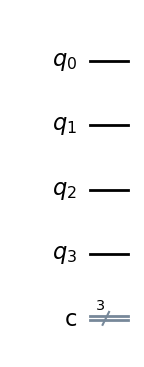

In [8]:
# --- 1. CONFIGURAÇÃO ---
# Precisamos de qubits para "contar" a fase (precisão) e 1 (q3) para sofrer a ação
num_qubits_contagem = 3 
num_qubits_total = num_qubits_contagem + 1 # +1 para o alvo

qc = QuantumCircuit(num_qubits_total, num_qubits_contagem)
qc.draw('mpl')

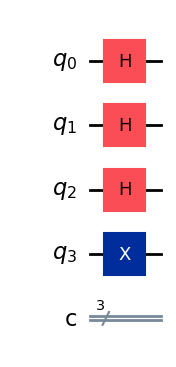

In [9]:
# --- 2. PREPARAÇÃO ---
# Colocar os qubits de contagem em superposição (para receberem o kickback)
for qubit in range(num_qubits_contagem):
    qc.h(qubit)

# Colocar o qubit alvo (o último) no estado |1>
# (O Kickback só funciona se o alvo for |1>, lembre-se do eigenstate)
qc.x(num_qubits_contagem)
qc.draw('mpl')

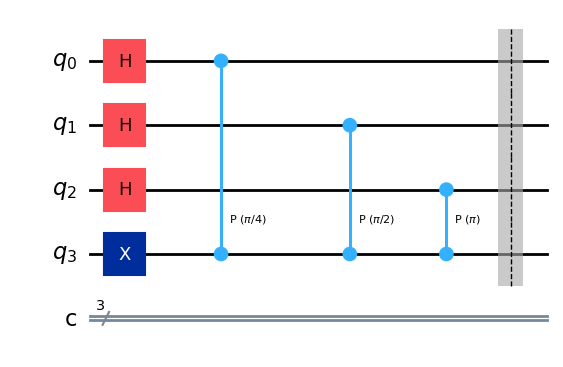

In [10]:

# --- 3. APLICAÇÃO DA PORTA "MISTERIOSA" (U) ---
# Vamos definir nossa fase secreta: 1/8 de volta
# Fase = 2 * pi * (1/8)
fase_secreta = 2 * np.pi * (1/8)

# Aplicamos a porta controlada repetidamente (Kickback em cascata)
# Qubit 0 aplica U^1
# Qubit 1 aplica U^2
# Qubit 2 aplica U^4
repeticoes = 1
for counting_qubit in range(num_qubits_contagem):
    # PhaseGate Controlada (CP)
    # qc.cp(angulo, controle, alvo). Esta porta foi vista anteriormente.
    qc.cp(fase_secreta * repeticoes, counting_qubit, num_qubits_contagem)
    repeticoes = repeticoes * 2

qc.barrier()
qc.draw('mpl')

C:\Users\Max\AppData\Local\Temp\ipykernel_18328\2763487660.py:4: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc_iqft = QFT(num_qubits_contagem, inverse=True).to_gate()


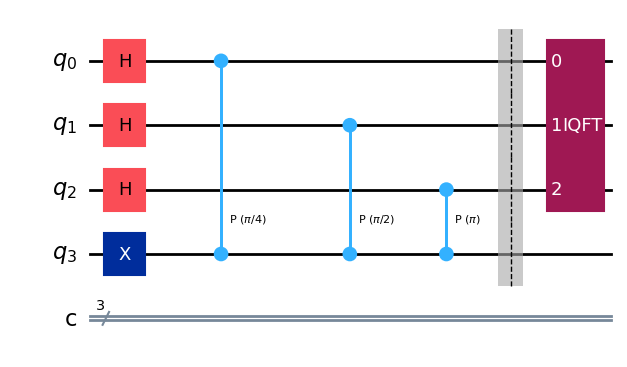

In [11]:

# --- 4. O DECODIFICADOR (QFT INVERSA) ---
# Até aqui, a informação do ângulo está escondida na fase dos qubits de contagem.
# A QFT Inversa traduz isso para bits legíveis (0 ou 1).
qc_iqft = QFT(num_qubits_contagem, inverse=True).to_gate()
qc.append(qc_iqft, range(num_qubits_contagem))
qc.draw('mpl')

In [12]:

# --- 5. MEDIÇÃO ---
qc.measure(range(num_qubits_contagem), range(num_qubits_contagem))


In [13]:

# --- EXECUÇÃO ---
simulador = AerSimulator()
job = simulador.run(transpile(qc, simulador), shots=1024)
contagens = job.result().get_counts()


In [14]:

# --- INTERPRETAÇÃO ---
# A saída será um binário, ex: '001'.
# Isso deve ser lido como fração binária: 0.001
# 0*(1/2) + 0*(1/4) + 1*(1/8) = 1/8.

print("\n--- Resultado da QPE ---")
print(f"Contagens (Binário): {contagens}")

# Converter o binário mais provável para decimal
leitura_binaria = list(contagens.keys())[0]
decimal = int(leitura_binaria, 2)
fase_estimada = decimal / (2**num_qubits_contagem)

print(f"Binário lido: {leitura_binaria} (Decimal: {decimal})")
print(f"Fase Estimada: {fase_estimada}")
print(f"Fase Real Esperada: {1/8}")


--- Resultado da QPE ---
Contagens (Binário): {'001': 1024}
Binário lido: 001 (Decimal: 1)
Fase Estimada: 0.125
Fase Real Esperada: 0.125


### Análise do Código

1. **O "Truque" da Potência:**
Você notou o `repeticoes *= 2`?
* O Qubit 0 verifica a fase uma vez.
* O Qubit 1 verifica a fase duas vezes.
* O Qubit 2 verifica a fase quatro vezes.
Isso é exatamente como a transformada de Fourier funciona: decompondo o sinal em frequências diferentes.


2. **A Precisão:**
Usamos 3 qubits de contagem. Isso significa que podemos medir fases com precisão de até $1/2^3 = 1/8$.
Se a fase fosse $1/16$, precisaríamos de 4 qubits. Se usássemos apenas 3, o resultado seria aproximado (probabilístico).

### Por que isso é a base da quebra de criptografia (Shor)?

Para quebrar o RSA, precisamos encontrar o período  de uma função modular $a^x \pmod N$.
O Algoritmo de Shor transforma esse problema matemático num problema de **estimar a fase** de um operador quântico criado a partir desse número .

Você acabou de implementar o "motor" do algoritmo de Shor. O resto é apenas aritmética clássica para preparar o problema para o motor rodar.

---

Você completou o ciclo "Core" da computação quântica baseada em gates (Gate-based Quantum Computing).

1. Álgebra Linear ✅
2. Circuitos e Qiskit ✅
3. Algoritmos Básicos (Teletransporte, Grover) ✅
4. Algoritmos Avançados (QFT, QPE) ✅